Import Statments

In [36]:
# importing libraries
import tensorflow as tf
import tensorflow_addons as tfa
import keras
import os
import random 
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


C:\Users\abdul basit\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Split Dataset

In [14]:
## to split dataset folders into train, val, and test

#!pip install python_splitter
import python_splitter
python_splitter.split_from_folder('C:/Users/abdul basit/Documents/Aliya_FYP/Plant_Dataset', train = 0.6, test = 0.2, val = 0.2)


✅Checking SOURCE directory...
0.6 0.2 0.2
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


Set Path to Dataset

In [44]:
# Setting Dataset path 

dataset_path = 'C:/Users/abdul basit/Documents/Aliya_FYP/Train_Test_Folder'

class_names = ['Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
               ,'Rose___Black_spot','Rose___healthy','Tomato___Late_blight','Tomato___healthy']


Plotting Images

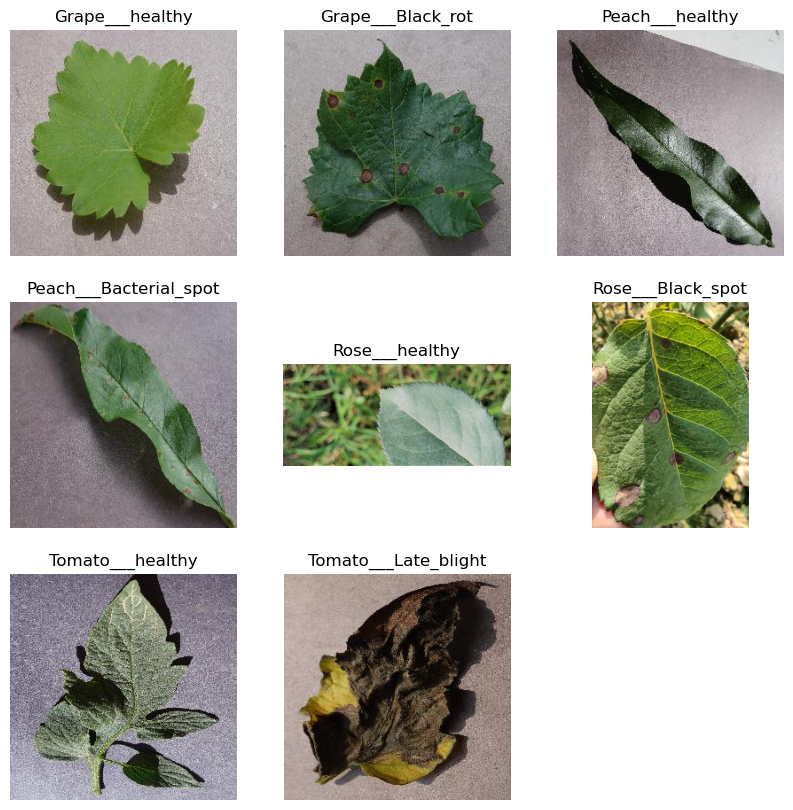

In [16]:
## Plot images of each class using matplotlib

plt.figure(figsize=(10, 10))

# i for deciding the subplot area
i = 1
for classes in class_names:
    ## 3 rows , 3 cols and the place where the next plot will be shown
    ax = plt.subplot(3, 3, i)
    ## randomly choosing an image from a class
    plt.imshow(mpimg.imread(os.path.join(dataset_path + '/test/' + classes, random.choice(os.listdir(dataset_path + '/test/' + classes)))))
    plt.title(classes)
    plt.axis("off")
    # update the area where the next plot will be plotted
    i = i+1


Augmenting the dataset

In [ ]:
# import augmentor library to augment the traning dataset only
#!pip install Augmentor
#import Augmentor

#for class_name in class_names:
#  aug = Augmentor.Pipeline(dataset_path+'/train/'+class_name)

#  aug.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#  aug.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
#  aug.flip_left_right(probability=0.5)
#  aug.flip_top_bottom(probability=0.5)
#  aug.sample(3000)


Preprocess the Data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# normalize according to model architecture
from tensorflow.keras.applications.resnet50 import preprocess_input , decode_predictions

img_height, img_width = (224,224)
batch_size = 32

aug = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_ds = aug.flow_from_directory(
  dataset_path+'/train/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = batch_size,
  subset = "training")

valid_ds = aug.flow_from_directory(
  dataset_path+'/val/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = batch_size,
  subset = "validation")

test_ds = aug.flow_from_directory(
  dataset_path+'/test/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = 1,
  subset = "validation")



Found 4070 images belonging to 8 classes.
Found 336 images belonging to 8 classes.
Found 337 images belonging to 8 classes.


ResNet 50 Model Training

In [40]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet')
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(train_ds.num_classes, activation='softmax')
    ])

base_model.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, epochs=15, validation_data=valid_ds)


Epoch 1/15
128/128 [==============================] - 462s 4s/step - loss: 0.5373 - accuracy: 0.8509 - val_loss: 5.0364 - val_accuracy: 0.4643
Epoch 2/15
128/128 [==============================] - 462s 4s/step - loss: 0.2315 - accuracy: 0.9329 - val_loss: 1.4590 - val_accuracy: 0.7202
Epoch 3/15
128/128 [==============================] - 457s 4s/step - loss: 0.2416 - accuracy: 0.9327 - val_loss: 1829.3359 - val_accuracy: 0.3006
Epoch 4/15
128/128 [==============================] - 476s 4s/step - loss: 0.1846 - accuracy: 0.9563 - val_loss: 0.6064 - val_accuracy: 0.8333
Epoch 5/15
128/128 [==============================] - 476s 4s/step - loss: 0.0809 - accuracy: 0.9720 - val_loss: 0.1457 - val_accuracy: 0.9613
Epoch 6/15
128/128 [==============================] - 461s 4s/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0710 - val_accuracy: 0.9762
Epoch 7/15
128/128 [==============================] - 467s 4s/step - loss: 0.0688 - accuracy: 0.9781 - val_loss: 0.0874 - val_accuracy: 0.9

Fitting Model

In [43]:
history = model.fit(train_ds, validation_data=test_ds, epochs=15)

Epoch 1/15
128/128 [==============================] - 512s 4s/step - loss: 0.0330 - accuracy: 0.9914 - val_loss: 0.1447 - val_accuracy: 0.9496
Epoch 2/15
128/128 [==============================] - 502s 4s/step - loss: 0.0457 - accuracy: 0.9892 - val_loss: 0.0207 - val_accuracy: 0.9970
Epoch 3/15
128/128 [==============================] - 469s 4s/step - loss: 0.0428 - accuracy: 0.9857 - val_loss: 0.0594 - val_accuracy: 0.9881
Epoch 4/15
128/128 [==============================] - 466s 4s/step - loss: 0.0553 - accuracy: 0.9860 - val_loss: 0.0857 - val_accuracy: 0.9674
Epoch 5/15
128/128 [==============================] - 478s 4s/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.2597 - val_accuracy: 0.9050
Epoch 6/15
128/128 [==============================] - 476s 4s/step - loss: 0.0446 - accuracy: 0.9870 - val_loss: 0.0362 - val_accuracy: 0.9822
Epoch 7/15
128/128 [==============================] - 480s 4s/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.1265 - val_accuracy: 0.9763

Test Model Accuracy

In [45]:
score = model.evaluate(test_ds)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#model.save('resnet50_model.h5')


337/337 [==============================] - 23s 68ms/step - loss: 0.0493 - accuracy: 0.9792
Test loss: 0.04934189096093178
Test accuracy: 0.9792284965515137


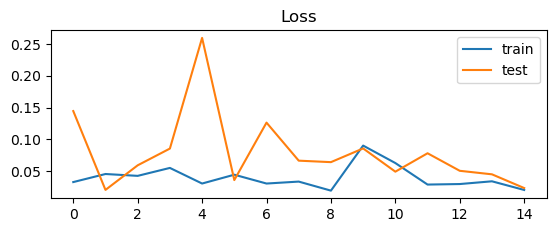

In [46]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training


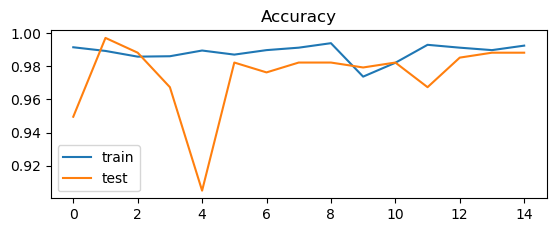

In [47]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [31]:

# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(test_ds), axis=-1)

337/337 [==============================] - 20s 59ms/step


NameError: name 'accuracy_score' is not defined

In [48]:
model.save('resnet502')

INFO:tensorflow:Assets written to: resnet502\assets


INFO:tensorflow:Assets written to: resnet502\assets


In [28]:
saved_model_dir = "resnet50/"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_file = 'model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)